# Face-mask Detection
----

In [ ]:
!kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 98% 203M/207M [00:01<00:00, 143MB/s]
100% 207M/207M [00:01<00:00, 150MB/s]


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!unzip covid-face-mask-detection-dataset.zip

In [ ]:
import os 
main_dir = '/content/New Masks Dataset'
train_dir =os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')
train_mask_dir = os.path.join(train_dir,'Mask')
train_nomask_dir = os.path.join(train_dir,'Non Mask')
test_mask_dir = os.path.join(test_dir,'Mask')
test_nomask_dir = os.path.join(test_dir,'Non Mask')
valid_mask_dir = os.path.join(valid_dir,'Mask')
valid_nomask_dir = os.path.join(valid_dir,'Non Mask')

In [ ]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

test_mask_names = os.listdir(test_mask_dir)
print(test_mask_names[:10])

test_nomask_names = os.listdir(test_nomask_dir)
print(test_nomask_names[:10])

['0427.jpg', '1506.jpg', '1527.jpg', '1554.jpg', '0150.jpg', '1115.jpg', '0205.jpg', '1520.jpg', '0211.jpg', '1635.jpg']
['151.jpg', '26.jpg', '212.jpg', '198.jpg', '131.jpg', '237.jpg', '203.jpg', '134.jpg', '18.jpg', '316.jpg']
['2158.png', '2113.jpg', '2086.jpg', '2260.png', '2300.png', '2178.png', '2130.jpg', '2263.png', '2190.png', '2170.png']
['real_01051.jpg', 'real_01033.jpg', 'real_01069.jpg', 'real_01056.jpg', 'real_01039.jpg', 'real_01037.jpg', 'real_01048.jpg', 'real_01070.jpg', 'real_01038.jpg', 'real_01079.jpg']


In [ ]:
print("train dataset mask images :",len(train_mask_names))
print("train dataset nomask images :",len(train_nomask_names))
print("test dataset mask images :",len(test_mask_names))
print("test dataset nomask images :",len(test_nomask_names))
print("Total train images :",len(train_mask_names+train_nomask_names))
print("Total test images :",len(test_mask_names+test_nomask_names))

train dataset mask images : 300
train dataset nomask images : 300
test dataset mask images : 50
test dataset nomask images : 50
Total train images : 600
Total test images : 100


['/content/New Masks Dataset/Train/Mask/0427.jpg', '/content/New Masks Dataset/Train/Mask/1506.jpg', '/content/New Masks Dataset/Train/Mask/1527.jpg', '/content/New Masks Dataset/Train/Mask/1554.jpg', '/content/New Masks Dataset/Train/Mask/0150.jpg', '/content/New Masks Dataset/Train/Mask/1115.jpg', '/content/New Masks Dataset/Train/Mask/0205.jpg', '/content/New Masks Dataset/Train/Mask/1520.jpg']
['/content/New Masks Dataset/Train/Non Mask/151.jpg', '/content/New Masks Dataset/Train/Non Mask/26.jpg', '/content/New Masks Dataset/Train/Non Mask/212.jpg', '/content/New Masks Dataset/Train/Non Mask/198.jpg', '/content/New Masks Dataset/Train/Non Mask/131.jpg', '/content/New Masks Dataset/Train/Non Mask/237.jpg', '/content/New Masks Dataset/Train/Non Mask/203.jpg', '/content/New Masks Dataset/Train/Non Mask/134.jpg']


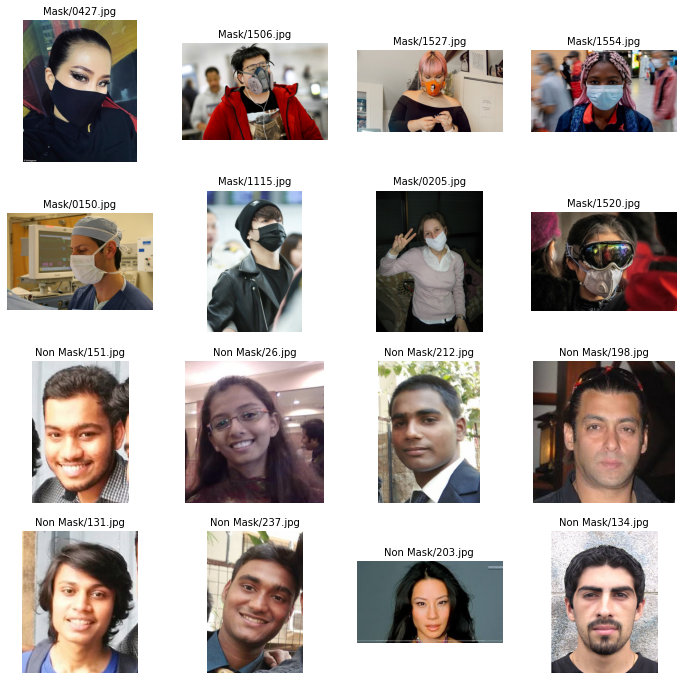

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
covid_pic = []
for i in train_mask_names[0:8]:
  covid_pic.append(os.path.join(train_mask_dir,i))

normal_pic = []
for i in train_nomask_names[0:8]:
  normal_pic.append(os.path.join(train_nomask_dir,i))
print(covid_pic)
print(normal_pic)

merged_pics = covid_pic+normal_pic

for i in range(0,len(merged_pics)):
  data = merged_pics[i].split('/',4)[4]
  sp =plt.subplot(4,4,i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_pics[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   	rotation_range=40,
                                    zoom_range=0.2,
                                   horizontal_flip = True)                               


validation_datagen = ImageDataGenerator(rescale = 1./255)


test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir ,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

validation_generator = train_datagen.flow_from_directory(valid_dir ,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test_dir ,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 600 images belonging to 2 classes.
Found 306 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)            

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(Adam(lr = 0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(train_generator,
                    epochs=30,
                    validation_data = validation_generator)

Epoch 1/30
19/19 [==============================] - 18s 914ms/step - loss: 2.0450 - accuracy: 0.5167 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/30
19/19 [==============================] - 16s 856ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/30
19/19 [==============================] - 16s 856ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/30
19/19 [==============================] - 15s 829ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/30
19/19 [==============================] - 16s 836ms/step - loss: 0.6930 - accuracy: 0.5433 - val_loss: 0.6936 - val_accuracy: 0.4444
Epoch 6/30
19/19 [==============================] - 16s 842ms/step - loss: 0.6841 - accuracy: 0.5533 - val_loss: 0.7059 - val_accuracy: 0.4641
Epoch 7/30
19/19 [==============================] - 16s 842ms/step - loss: 0.6849 - accuracy: 0.6050 - val_loss: 0.7008 - val_accuracy: 0.4575

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

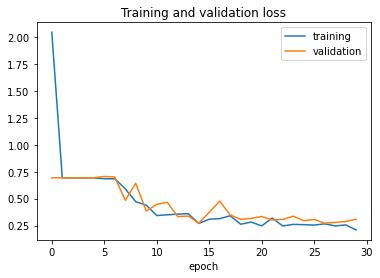

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

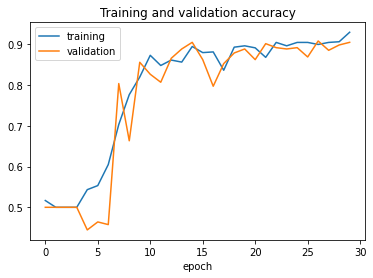

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

4/4 [==============================] - 1s 343ms/step - loss: 0.2473 - accuracy: 0.8900
test acc :0.8899999856948853 test loss:0.24725432693958282


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for filename in uploaded.keys():
  img_path='/content/'+filename
  img = image.load_img(img_path , target_size=(150,150))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(prediction)
  if prediction==0:
    print('mask')
  else:
    print('nomask')

Saving mask3.jpeg to mask3 (3).jpeg
Saving notmask2.jpeg to notmask2 (3).jpeg
Saving notmask1.jpg to notmask1 (3).jpg
[[0.]]
mask
[[0.95160735]]
nomask
[[4.560808e-19]]
nomask


In [ ]:
model.save('models.h5')

In [ ]:
from google.colab import files
files.download('models.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

----